## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV  

## Iris

In [9]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 123)

clf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state = 123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Feature names: ", iris.feature_names)
print("Feature importance: ", clf.feature_importances_)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.06682784 0.01220834 0.50116103 0.41980278]
Accuracy:  0.9555555555555556


## Wine

In [13]:
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.3, random_state = 123)

from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state = 123, n_jobs = -1)

param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10],
              "n_estimators" : [50, 100], # 使用 n 顆樹
              "max_features" : ['auto', 'sqrt'], # 如何選取 features
              "oob_score" : [True]
             }
gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 123),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

best_score  : 0.9838709677419355
best_params : {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'oob_score': True} 

Accuracy:  0.9444444444444444


E:\Anaconda3\envs\mypython\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


feature_importances_ : 
[0.12932897 0.02089026 0.0089398  0.02317669 0.03891071 0.04761771
 0.11716606 0.00750421 0.01981423 0.14491245 0.08249128 0.14128081
 0.21796683]
 
Features sorted by their score:
(0.2179668338, 'proline')
(0.1449124461, 'color_intensity')
(0.1412808107, 'od280/od315_of_diluted_wines')
(0.1293289731, 'alcohol')
(0.1171660581, 'flavanoids')
(0.0824912767, 'hue')
(0.0476177082, 'total_phenols')
(0.0389107107, 'magnesium')
(0.0231766861, 'alcalinity_of_ash')
(0.0208902551, 'malic_acid')
(0.0198142261, 'proanthocyanins')
(0.0089398004, 'ash')
(0.0075042148, 'nonflavanoid_phenols')


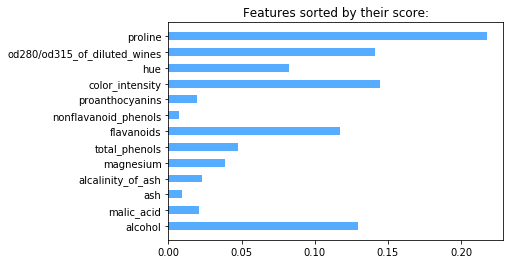

accuracy = 1.000000 


In [25]:
print("feature_importances_ : \n%s\n " % (clf.feature_importances_))

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

names = wine.feature_names
svc = SVC(kernel = 'linear')
rfecv = RFECV(estimator = svc, step = 1, cv = StratifiedKFold(2),
              scoring = 'accuracy')
rfecv.fit(X_train, y_train)
print("Features sorted by their score:")

a = sorted(zip(map(lambda x: round(x, 10), clf.feature_importances_), names), reverse = True)
ind = np.arange(0, len(list(a)), 1)
for i in ind :
    print(a[i])
    
width = 0.5
plt.barh(ind, clf.feature_importances_, width, facecolor = "dodgerblue", align = "center", alpha = 0.75)
plt.title("Features sorted by their score:")
plt.yticks(ind, names)
plt.show() 

print("accuracy = %f " % (clf.score(X_train, y_train)))

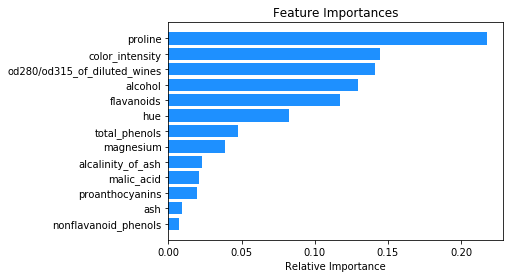

In [28]:
features = wine['feature_names']
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='dodgerblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()